In [324]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt


In [312]:
data=pd.read_csv('C:\\Users\malli\Downloads\Simpli learn\ML\Demo Datasets\Lesson 4\\Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [313]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [314]:
data.shape

(200, 4)

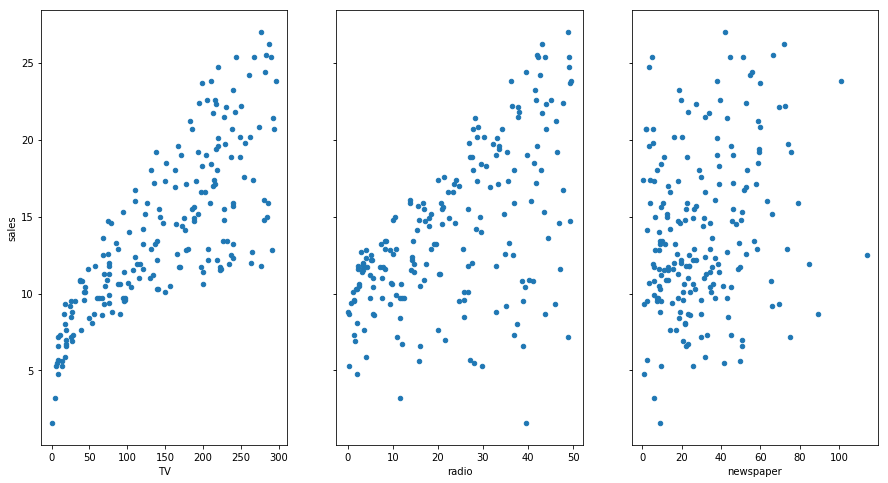

In [325]:
fig,axs=plt.subplots(1,3, sharey=True)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(15,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [306]:
feature_col=['TV']
x=data[feature_col]
y=data.sales

In [273]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [274]:
print(lr.intercept_)
print(lr.coef_)

7.032593549127693
[0.04753664]


In [275]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [276]:
x_new=pd.DataFrame({'TV':[50]})
lr.predict(x_new)

array([9.40942557])

In [277]:
x_new=pd.DataFrame({'TV':[data.TV.max(),data.TV.min()]})
print(x_new)
preds=lr.predict(x_new)
preds

      TV
0  296.4
1    0.7


array([21.12245377,  7.0658692 ])

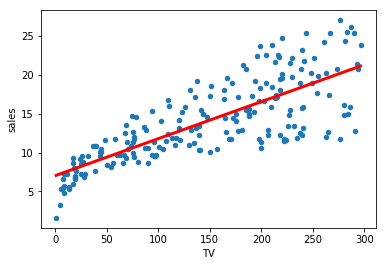

In [278]:
data.plot(kind='scatter',x='TV',y='sales')
plt.plot(x_new,preds,c='red',linewidth=3)

In [279]:
import statsmodels.formula.api as smf

In [280]:
lr=smf.ols(formula='sales ~ TV',data=data).fit()

In [281]:
lr.conf_int()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.47e-42
Time:                        21:02:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
lr.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [283]:
lr.rsquared

0.611875050850071

In [284]:
feature_cols=['TV','radio','newspaper']
x=data[feature_cols]
y=data.sales

In [285]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [286]:
lr=LinearRegression()
lr.fit(x,y)
print(lr.intercept_)
print(lr.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [287]:
lr.fit(xtrain,ytrain)
print(lr.intercept_)
print(lr.coef_)

2.70894909251591
[0.04405928 0.1992875  0.00688245]


In [288]:
predictions=lr.predict(xtest)
predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [289]:
print(sqrt(mean_squared_error(ytest,predictions)))

1.9485372043446387


In [290]:
lr=smf.ols(formula='sales ~ TV + radio + newspaper',data=data).fit()
lr.conf_int()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        21:02:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
lr.rsquared

0.8972106381789522

In [292]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})

In [293]:
pd.get_dummies(df, prefix=['col1','col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [294]:
np.random.seed(10)
np.random.rand(4)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388])

In [295]:
np.random.seed(10)
np.random.rand(4)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388])

In [296]:
np.random.rand(4)

array([0.49850701, 0.22479665, 0.19806286, 0.76053071])

In [297]:
import numpy as np
np.random.seed(123)
nums=np.random.rand(len(data))
filter0=nums>0.5
data['Size']='small'
data.loc[filter0,'Size']='large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,large
5,180.8,10.8,58.4,12.9,large


In [299]:
data['Islarge'] = data.Size.map({'small':0,'large':1})
data.head()

,TV,radio,newspaper,sales,Size,Islarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,large,1
5,180.8,10.8,58.4,12.9,large,1


In [300]:
feature_cols=['TV','radio','newspaper','Islarge']
x=data[feature_cols]
y=data.sales

lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)